# Formula for Analysis Frame. Economic Gains from Equity

We focus only on the labor contributions to aggregate output, considering both the quantity of labor input and the productivity of labor inputs. 

The labor component of aggregate output $Y_{L}$ can be written as:

### $Y_{L}$ = (N x $\frac{H}{N}$) x F(e, u, io)

Where 
* N is the number of workers
* H / N is hours worked per worker
* (e) is educational attainment
* (u) is the degree of skill utilization
* (io) is selected industry/occupation groups. 

This simple expression frames our analysis.

# EMOVI 2017 

## Description EMOVI 2017 (Updated Dataset)

## [Variable Dictionary](https://docs.google.com/spreadsheets/d/1eq_jNQteZfJ_bSU_IepNV02tP_Vp6xf8/edit?usp=sharing&ouid=101522009607038736699&rtpof=true&sd=true)

1. df["p06"] = Gender
    * 1 = Male
    * 2 = Female

2. df["p151"] = PERLA Skin Color 

3. df["p05"] = Age

4. df["p13"] = Ultimo nivel que alcanzo en la escuela

  * **Make 4 Groups Educational Attainment:**
      * Ninguno 
          97. No fue a la escuela
      * Primaria 
          1. Kinder
          2. Primaria
      * Bachillerato y Carrera Trunca
          3. Secundaria técnica
          4. Secundaria general
          5. Preparatoria técnica
          6. Preparatoria general
          7. Técnica o comercial con secundaria
          8. Técnica o comercial con preparatoria
          9. Normal básica
      * Universidad de 4 años y posgrado
          10. Normal de licenciatura
          11. Profesional
          12. Posgrado

* Additional information:
  * df["p64"] = Edad que dejo de asistir a la escuela	4-64
  * **df["p63d"] = Escuelas privadas/publicas: universidad?** (Quality of schooling)

5. df["p133"] = Income
  * df["p132"] = Num miembros que aportan ingresos al hogar
  * df["p133"] = Ingreso total que recibe este hogar en un mes normal
  * df["p82"] - df["p85_9_1"] = prestaciones

* df["p68"] = Work Situation. ¿La semana pasada trabajo por lo menos una hora?
  
* df["p86"] = Weekly Hours Worked

* Degree of skill utilization
  * df["p114"] = Cuanto sirvieron habilidades de escuela en primer trabajo
  * df["p115"] = Primer trabajo fue acorde con sus estudios
  * df["p78"] = Tiene personal a su cargo en su trabajo
  * df["p79"] = Num personas que estan a su cargo


*  Selected industry/occupation groups
    * df["p75"] Tareas que desempeña en su trabajo
    * df["p76"] Nombre de su oficio, puesto o cargo
    * df["p76"] codificación ocupación del entrevistado, SINCO
    * df["p76"] codificación ocupación del entrevistado, CIUO
    * df["p77"] Posicion en el trabajo
    * df["p80"] A que se dedica la empresa donde usted trabaja
    * df["p80"] A que se dedica la empresa donde usted trabaja SCIAN

## Total Variables I need

* df["p06"] = gender
* df["p151"] = PERLA Skin Color
* df["p05"] = age
* df["p13"] = academic attainment
* df["p64"] = age you stopped going to school
* df["p63d"] = private or public university 
* df["p133"] = Total monthly income per home
* df["p132"] = How many people contribute to home income
* df["p82"] - df["p85_9_1"] = benefits
* df["p68"] = Employment ¿La semana pasada trabajo por lo menos una hora?
* df["p86"] = Weekly Hours Worked

* -

* df["p114"] = Cuanto sirvieron habilidades de escuela en primer trabajo
* df["p115"] = Primer trabajo fue acorde con sus estudios
* df["p78"] = Tiene personal a su cargo en su trabajo
* df["p79"] = Num personas que estan a su cargo

* -

* df["p75"] = Tareas que desempeña en su trabajo
* df["p76"] = Nombre de su oficio, puesto o cargo
* df["p76"] = Codificación ocupación del entrevistado, SINCO
* df["p76"] = Codificación ocupación del entrevistado, CIUO
* df["p77"] = Posicion en el trabajo
* df["p80"] = A que se dedica la empresa donde usted trabaja
* df["p80"] = A que se dedica la empresa donde usted trabaja SCIAN


* Adicional para autoempleados:
    * df["p127_81"] - df["p128f"] = Servicios Financieros (ver si al tener piel obscura tienen menor acceso a creditos, por ejemplo)


* Adicional Discriminación (cualitativas):
    * df["p150a"] - df["p150f_11"]
    * Estas pueden ser muy interesantes para probar lo invisible que es la discriminación. Apesar de que podemos comprobar con números que la discriminación existe, no se percibe
        * Problema:
            * Esto puede ser un tema de correlation no causation o algo así
            * Tienes que poder probar o argumentar que aunque la pobreza está altamente correlacionada con el color de piel, se debe de abordar. 

## Coding EMOVI 2017 (Final dataset used for the paper)


In [1]:
!pip install pyreadstat

     |████████████████████████████████| 585 kB 2.3 MB/s eta 0:00:01


In [2]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

dtafile = "/Users/fernandogutierrez/Desktop/Berkeley/Topics on Economic Research/GitHub Files/ESRU-EMOVI 2017 Entrevistado.dta"
df, meta = pyreadstat.read_dta(dtafile, encoding="latin1")

In [3]:
print("'adultos.dta' has ",df.shape[0], "rows", "and", df.shape[1], "columns")

'adultos.dta' has  17665 rows and 366 columns


In [5]:
#from google.colab import drive
#drive.mount("/content/drive")

#!ls "/content/drive/MyDrive/Topics on Economic Research/ESRU-EMOVI 2017 Entrevistado.dta"

In [6]:
df

,folio,Estado,folio_ageb,consecutivo,Origen,Latitud,Longitud,LatitudGP,LongitudGP,recontacto,...,region,cdmx,tot_int,rururb,cmo1_2,cmo2_2,cmo3_2,cmo4_2,cmo5_2,tamhog
0,0100100010286020830102,1.0,0100100010286,1,1.0,21.901323,-102.310598,21.901477,-102.310429,2,...,3.0,NaN,5.0,0.0,41,.,.,13,.,5.0
1,0100100010286020850201,1.0,0100100010286,1,2.0,21.901323,-102.310598,21.900773,-102.311138,1,...,3.0,NaN,1.0,0.0,41,.,.,41,.,1.0
2,0100100010286025830201,1.0,0100100010286,1,1.0,21.900830,-102.311818,21.900549,-102.313361,1,...,3.0,NaN,2.0,0.0,81,.,.,11,.,2.0
3,0100100010286025840101,1.0,0100100010286,1,1.0,21.901188,-102.310700,21.900765,-102.313144,1,...,3.0,NaN,1.0,0.0,52,.,.,.,.,1.0
4,0100100010286025850101,1.0,0100100010286,1,2.0,21.901188,-102.310700,21.900577,-102.312733,1,...,3.0,NaN,2.0,0.0,52,.,.,.,.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,3205700010022019460402,32.0,3205700010022,2,1.0,22.755409,-102.513985,22.755409,-102.513985,1,...,2.0,NaN,4.0,0.0,71,.,.,.,71,4.0
17661,3205700010022025450501,32.0,3205700010022,2,1.0,22.288405,-101.577532,22.288405,-101.577532,1,...,2.0,NaN,4.0,0.0,.,.,.,82,71,4.0
17662,3205700010022025460301,32.0,3205700010022,2,1.0,22.758625,-102.499375,22.758625,-102.499375,1,...,2.0,NaN,6.0,0.0,.,.,.,53,52,6.0
17663,3205700010022025460302,32.0,3205700010022,2,1.0,22.755420,-102.513997,22.755420,-102.513997,1,...,2.0,NaN,5.0,0.0,.,52,.,53,62,5.0


### Clean Data

In [7]:
if df.shape[1] > 22: #the original database has 366 columns
  print("The original database has", df.shape[1]," columns")
  print("Lets clean this!")
  #df.drop(df.loc[:, 'p01':'p03'].columns, axis = 1, inplace=True)
  #df.drop(df.loc[:, 'p09_1':'p12'].columns, axis = 1, inplace=True)
  #df.drop(df.loc[:, 'p13_1'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p15':'p23_2'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p25':'p62i'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p65':'p67'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p69':'p74'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p87':'p113'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p116':'p117'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p119':'p127_81'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p129a':'p131'].columns, axis = 1, inplace=True)
  df.drop(df.loc[:, 'p134a':'p149'].columns, axis = 1, inplace=True)
  print("Finished!")
  print("Now the database has only", df.shape[1], " columns!")
else:
  print("No need to clean it. The database is clean already")

The original database has 366  columns
Lets clean this!
Finished!
Now the database has only 135  columns!


Limiations:
* Income is family income. We are using the average
* Income is toped at 10 minimum salaries, which is around USD $1,000. This is a huge problem as census data does not have access to the Mexican upper class which is predominantly white. As a reference, according to Glassdoor, a Financial Analyst with no experience in Credit Suisse earns on average 37,567 - MX47,970, which is between 15 and 20 minimum salaries. If you look up the CEO salary in Mexico in Glassdoor, the average is 374,941 pesos, which is 156 minimum salaries. 

In [8]:
df = df.rename(columns={"p06": "gender","p151":"PERLA","p05":"age","p13":"academic_level","p64":"age_schl_drop","p133":"income","p132":"contributors","p68":"employed","p86":"H/N","p114":"school use in 1 job"})

### **IMPORTANT TO-DO**

Transform Income Variables (range of minimum salaries) into the average of the range (ej. in "p133", if answer = 4, the dictionary means between 2 and 3 minimum salaries. Thus, transform 4 into average of 2 and 3 minumum salaries: MXN $8,401

In [9]:
salaries_MXN = []
for i in df["income"]:
  if i==1:
    i = ((0+2399)/2)
  elif i == 2:
    i = 2400
  elif i == 3:
    i = ((2401 + 4800)/2)
  elif i == 4:
    i = ((7200 + 4801)/2)
  elif i == 5:
    i = ((7201 + 12000)/2)
  elif i == 6:
    i = ((12001 + 24000)/2)
  elif i == 7:
    i = 24001
  
  salaries_MXN.append(i)

#Add to dataframe
df["salaries_MXN"] = salaries_MXN

df[["income","salaries_MXN"]]

,income,salaries_MXN
0,4,6000.5
1,4,6000.5
2,4,6000.5
3,2,2400.0
4,3,3600.5
...,...,...
17660,3,3600.5
17661,1,1199.5
17662,2,2400.0
17663,1,1199.5


### Replicate Table 1

In [10]:
df["PERLA"]

0        8
1        8
2        8
3        9
4        8
        ..
17660    3
17661    5
17662    7
17663    5
17664    8
Name: PERLA, Length: 17665, dtype: int64

In [11]:
PERLA_Percentage = df['PERLA'].value_counts(normalize=True,sort=False).sort_index(ascending = False)
print("Group 11 population percentage: ",PERLA_Percentage[1]*100,"%")
print("Group 10 population percentage: ",PERLA_Percentage[2]*100,"%")
print("Group 9 population percentage: ",PERLA_Percentage[3]*100,"%")
print("Group 8 population percentage: ",PERLA_Percentage[4]*100,"%")
print("Group 7 population percentage: ",PERLA_Percentage[5]*100,"%")
print("Group 6 population percentage: ",PERLA_Percentage[6]*100,"%")
print("Group 5 population percentage: ",PERLA_Percentage[7]*100,"%")
print("Group 4 population percentage: ",PERLA_Percentage[8]*100,"%")
print("Group 3 population percentage: ",PERLA_Percentage[9]*100,"%")
print("Group 2 population percentage: ",PERLA_Percentage[10]*100,"%")
print("Group 1 population percentage: ",PERLA_Percentage[11]*100,"%")
#PERLA_Percentage

Group 11 population percentage:  0.10189640532125673 %
Group 10 population percentage:  0.3226719501839796 %
Group 9 population percentage:  0.6849702802151146 %
Group 8 population percentage:  1.9020662326634588 %
Group 7 population percentage:  4.455137277101613 %
Group 6 population percentage:  16.824228700820832 %
Group 5 population percentage:  29.204641947353522 %
Group 4 population percentage:  35.38635720350977 %
Group 3 population percentage:  6.742145485423152 %
Group 2 population percentage:  3.7588451740730258 %
Group 1 population percentage:  0.6170393433342769 %


In [12]:
#Make 3 groups by skin
      #White (PERLA 1-3)
      #Light and Medium Brown (PERLA 4-5)
      #Brown and Dark Brown (PERLA 6-11) (Campos Fig 4)

SkinGroups = []
for i in df["PERLA"]:
  if (9<=i) & (i<=11):
    i = 1
  elif (7<=i) & (i<=8):
    i = 2
  elif (1<=i) & (i<=6):
    i = 3
  
  SkinGroups.append(i)

#Add to dataframe
df["Skin_Groups"] = SkinGroups

In [13]:
df1 = df[["gender","PERLA","Skin_Groups","age","academic_level","age_schl_drop","salaries_MXN","contributors","employed","H/N"]]

In [14]:
#choose only those who are employed for the GDP analysis

df1 = df[df["employed"]==1]

In [15]:
gdp_df = df1[["PERLA","Skin_Groups","salaries_MXN","contributors","gender"]]
gdp_df = gdp_df.groupby(["Skin_Groups"]).mean()
income_sort = gdp_df["salaries_MXN"].sort_values(ascending=False)
gender_sort = gdp_df["gender"].sort_values(ascending=False)

gdp_df

#The whitest group has the highest number of contributors and it has the largest amount of women.

,PERLA,salaries_MXN,contributors,gender
Skin_Groups,,,,
1,9.475531,6769.349030,1.735919,1.551247
2,7.544838,4894.108552,1.704468,1.496610
3,5.486203,4398.208900,1.656432,1.371551


In [16]:
Skin_Groups_Percentage = df1['Skin_Groups'].value_counts(normalize=True,ascending=True)
print("Group 1 population percentage: ",Skin_Groups_Percentage[1]*100,"%")
print("Group 2 population percentage: ",Skin_Groups_Percentage[2]*100,"%")
print("Group 3 population percentage: ",Skin_Groups_Percentage[3]*100,"%")

Group 1 population percentage:  10.674157303370785 %
Group 2 population percentage:  63.96609501281293 %
Group 3 population percentage:  25.35974768381628 %


array([[<AxesSubplot:title={'center':'Skin_Groups'}>,
        <AxesSubplot:title={'center':'PERLA'}>]], dtype=object)

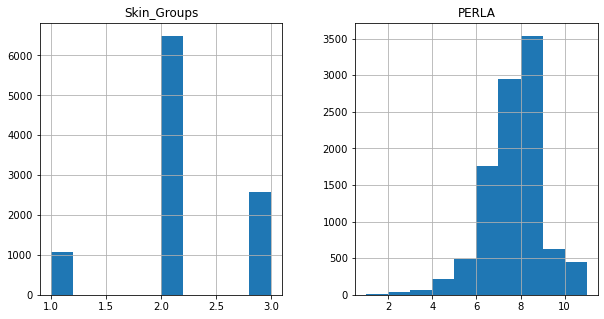

In [17]:
df1.hist(['Skin_Groups','PERLA'], figsize=(10, 5),sharex=False)

In [18]:
import copy

Table_1 = pd.DataFrame()
Table_1 = df1[df1.employed == 1]
Table_1 = Table_1[["Skin_Groups","salaries_MXN"]]
Table_1 = Table_1.groupby(["Skin_Groups"]).mean()
Table_1["Population%"] = Skin_Groups_Percentage

population_2017 = 60280187

Table_1["Population"] = Table_1["Population%"].mul(population_2017) 
Table_1["Population"] = pd.to_numeric(Table_1["Population"])


Table_1["Group_GDP"]= (Table_1["Population"]*Table_1["salaries_MXN"])*12

Total_1 = Table_1["Group_GDP"].sum()
Table_1.loc['Total_1'] = pd.Series(Table_1["Group_GDP"].sum(), index = ["Group_GDP"])

Table_1 

,salaries_MXN,Population%,Population,Group_GDP
Skin_Groups,,,,
1,6769.349030,0.106742,6.434402e+06,5.226806e+11
2,4894.108552,0.639661,3.855888e+07,2.264536e+12
3,4398.208900,0.253597,1.528690e+07,8.068199e+11
Total_1,NaN,NaN,NaN,3.594037e+12


In [19]:
Table_1_counterfactual = Table_1
Table_1_counterfactual["salaries_MXN"][1:3] = Table_1_counterfactual["salaries_MXN"][1]
Table_1_counterfactual["Group_GDP"]= (Table_1_counterfactual["Population"]*Table_1["salaries_MXN"])*12

Total_2 = Table_1_counterfactual["Group_GDP"].sum()
Table_1_counterfactual.loc['Total_2'] = pd.Series(Table_1_counterfactual["Group_GDP"].sum(), index = ["Group_GDP"])
Table_1_counterfactual = Table_1_counterfactual.drop(['Total_1'])

Table_1_counterfactual

,salaries_MXN,Population%,Population,Group_GDP
Skin_Groups,,,,
1,6769.34903,0.106742,6.434402e+06,5.226806e+11
2,6769.34903,0.639661,3.855888e+07,3.132222e+12
3,6769.34903,0.253597,1.528690e+07,1.241789e+12
Total_2,NaN,NaN,NaN,4.896692e+12


In [20]:
GDP_loss = Total_2 - Total_1
print("Lost in GDP (MXN): ",GDP_loss) 
print("Lost in GDP (USD 2017 conversion rate): ",GDP_loss/17.4655) 

Lost in GDP (MXN):  1302654788536.6113
Lost in GDP (USD 2017 conversion rate):  74584454412.21902


# V2 Proposal 

## Table 1

### Means of Key Variables

1. Generate a DataFrame with Key Variables 

2. Use Groupby to generate Key Variables means

* df["p06"] = gender
* df["p151"] = PERLA Skin Color
* df["p05"] = age
* df["p13"] = academic attainment
* df["p64"] = age you stopped going to school
* df["p63d"] = private or public university 
* df["p133"] = Total monthly income per home
* df["p132"] = How many people contribute to home income
* df["p82"] - df["p85_9_1"] = benefits
* df["p68"] = Employment ¿La semana pasada trabajo por lo menos una hora?
* df["p86"] = Weekly Hours Worked

* -

* df["p114"] = Cuanto sirvieron habilidades de escuela en primer trabajo (1 = Mucho, 4 = no le sirvieron)
* df["p78"] = Tiene personal a su cargo en su trabajo
* df["p79"] = Num personas que estan a su cargo


* Adicional para autoempleados:
    * df["p127_81"] - df["p128f"] = Servicios Financieros (ver si al ser morenos tienen menor acceso a creditos, por ejemplo)

In [21]:
Table_1_V1 = df[["gender","PERLA","Skin_Groups","age","academic_level","age_schl_drop","income","salaries_MXN","contributors","employed","H/N","school use in 1 job"]]

#cleaning for finding means
Table_1_V1 = Table_1_V1[Table_1_V1["employed"]==1]
Table_1_V1 = Table_1_V1.dropna()

#convert all objects to ints so we can find the means
Table_1_V1["academic_level"] = pd.to_numeric(Table_1_V1["academic_level"], errors='coerce').convert_dtypes()
Table_1_V1["age_schl_drop"] = pd.to_numeric(Table_1_V1["age_schl_drop"], errors='coerce').convert_dtypes() 
Table_1_V1["H/N"] = pd.to_numeric(Table_1_V1["H/N"], errors='coerce').convert_dtypes() 
#Table_1_V1["p114"] = pd.to_numeric(Table_1_V1["p114"], errors='coerce').convert_dtypes() 
#Table_1_V1["school use in 1 job"] = pd.to_numeric(Table_1_V1["school use in 1 job"], errors='coerce').convert_dtypes() 


#Replace "academic_level" 97 value (which means they did not go to school) with 0
Table_1_V1["academic_level"] = Table_1_V1["academic_level"].replace([97],0)

Table_1_V1.groupby("Skin_Groups").mean()
#Table_1_V1["academic_level"]


/var/folders/cr/mwjn7_vx4290gyhrvfv_04nm0000gn/T/ipykernel_1939/2975249770.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Table_1_V1.groupby("Skin_Groups").mean()


,gender,PERLA,age,academic_level,age_schl_drop,income,salaries_MXN,contributors,employed,H/N
Skin_Groups,,,,,,,,,,
1,1.559339,9.472763,42.139105,6.358949,18.502918,4.522374,6677.334630,1.731518,1.0,42.819066
2,1.497136,7.543748,42.228921,5.301941,17.388005,3.944321,4877.653834,1.702832,1.0,42.802895
3,1.375252,5.486497,43.075373,4.538896,16.354293,3.705764,4391.025998,1.655784,1.0,43.798468


## Table 2

Initial Model Estimates

# Regression 

In [22]:
import numpy as np
from statsmodels.formula.api import ols

In [23]:
Figure_1 = df[["gender","PERLA","Skin_Groups","age","academic_level","age_schl_drop","income","salaries_MXN","contributors","employed","H/N"]]
Figure_1 = Figure_1[Figure_1["employed"]==1]
Figure_1 = Figure_1.rename(columns={"H/N": "work_hrs"})
Figure_1 = Figure_1.dropna()

In [24]:
Figure_1["academic_level"].value_counts()

4     2372
2     2145
6     1773
11    1303
3      546
5      508
10     328
8      258
97     246
12     127
7      125
9       49
1       15
Name: academic_level, dtype: int64

Academic Levels

In [25]:
#Group Academic Levels

#0 = (97) did not go to school
#1 = (1:4) middle school or less
#2 = (5:9)high school ,technical and incomplete college degrees
#3 = (10:12) College + ,technical and incomplete college degrees


academic_groups = []
for i in Figure_1["academic_level"]:
  if (1<=i) & (i<=4):
    i = 1
  elif (5<=i) & (i<=9):
    i = 2
  elif (10<=i) & (i<=12):
    i = 3
  elif i == 97:
    i = 0
  
  academic_groups.append(i)

#Add to dataframe
Figure_1["academic_groups"] = academic_groups
#df["academic_groups"].value_counts()
Figure_1["academic_groups"].value_counts()
#Figure_1["academic_level","academic_groups"]

1    5078
2    2713
3    1758
0     246
Name: academic_groups, dtype: int64

In [26]:
Figure_1["work_hrs"] = pd.to_numeric(Figure_1["work_hrs"], errors='coerce').convert_dtypes()
Figure_1["work_hrs"] = Figure_1["work_hrs"].astype(int)
#Figure_1["work_hrs"].unique()

In [27]:
reg1 = ols("income ~ Skin_Groups", data = Figure_1).fit(cov_type = 'HC3')
reg1 = ols("income ~ Skin_Groups + gender", data = Figure_1).fit(cov_type = 'HC3')
reg2 = ols("income ~ Skin_Groups + gender + academic_groups", data = Figure_1).fit(cov_type = 'HC3')
reg3 = ols("income ~ Skin_Groups + gender + academic_groups + work_hrs", data = Figure_1).fit(cov_type = 'HC3')
reg4 = ols("income ~ Skin_Groups + gender + academic_groups + contributors", data = Figure_1).fit(cov_type = 'HC3')
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     371.1
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          4.72e-298
Time:                        16:30:16   Log-Likelihood:                -20613.
No. Observations:                9795   AIC:                         4.124e+04
Df Residuals:                    9790   BIC:                         4.127e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8260      0.119     

View multiple models in one table

In [28]:
!pip install stargazer

In [29]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([reg1, reg2, reg3, reg4])
HTML(stargazer.render_html())

/var/folders/cr/mwjn7_vx4290gyhrvfv_04nm0000gn/T/ipykernel_1939/2003542510.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = correlation_df.corr()


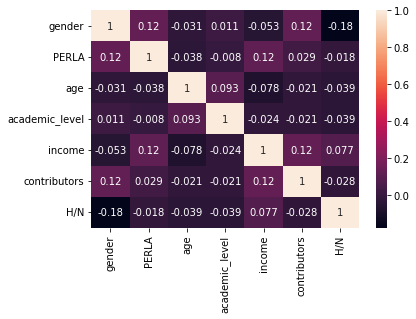

In [30]:
# Correlation Matrix

import seaborn as sn
import matplotlib.pyplot as plt

df = df[df["employed"]==1]
#correlation_df = df[["gender","PERLA","age","academic_level","age_schl_drop","income","contributors","H/N","employed"]]
correlation_df = df[["gender","PERLA","age","academic_level","age_schl_drop","income","contributors","H/N"]]
correlation_df = correlation_df.dropna()
#correlation_df = correlation_df[correlation_df["employed"]==1]
correlation_df["academic_level"] = pd.to_numeric(correlation_df["academic_level"], errors='coerce').convert_dtypes()
correlation_df["H/N"] = pd.to_numeric(correlation_df["H/N"], errors='coerce').convert_dtypes()
correlation_df["H/N"] = correlation_df["H/N"].astype(int)
correlation_df["academic_level"] = correlation_df["academic_level"].astype(int)

corrMatrix = correlation_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Trends

* Employment to Population Ratio Male
* Employment to Population Ratio Female
* Trends in Hours Male
* Trends in Hours Female
* Trends in Educational Attainment Male
* Trends in Educational Attainment Female
* Trends in Real Average Hourly Earnings in 2019 dollars Male
* Trends in Real Average Hourly Earnings in 2019 dollars Female

In [31]:
figure_1 = df[["Skin_Groups","employed","gender"]]

### Employment to Population Ratio Male

In [32]:
figure_1_male = figure_1[figure_1.gender == 1]

population_1 = [figure_1_male[figure_1_male["Skin_Groups"]==1].count()][0][0]
population_2 = [figure_1_male[figure_1_male["Skin_Groups"]==2].count()][0][0]
population_3 = [figure_1_male[figure_1_male["Skin_Groups"]==3].count()][0][0]

pop_1_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==1) & (figure_1["employed"]==1)].count()][0][0]
pop_2_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==2) & (figure_1["employed"]==1)].count()][0][0]
pop_3_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==3) & (figure_1["employed"]==1)].count()][0][0]

pop_1_percent = (pop_1_employed/population_1)*100
pop_2_percent = (pop_2_employed/population_2)*100
pop_3_percent = (pop_3_employed/population_3)*100

print(pop_1_percent, pop_2_percent, pop_3_percent)

100.0 100.0 100.0


/var/folders/cr/mwjn7_vx4290gyhrvfv_04nm0000gn/T/ipykernel_1939/774935735.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_1_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==1) & (figure_1["employed"]==1)].count()][0][0]
/var/folders/cr/mwjn7_vx4290gyhrvfv_04nm0000gn/T/ipykernel_1939/774935735.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_2_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==2) & (figure_1["employed"]==1)].count()][0][0]
/var/folders/cr/mwjn7_vx4290gyhrvfv_04nm0000gn/T/ipykernel_1939/774935735.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_3_employed = [figure_1_male[(figure_1_male["Skin_Groups"]==3) & (figure_1["employed"]==1)].count()][0][0]


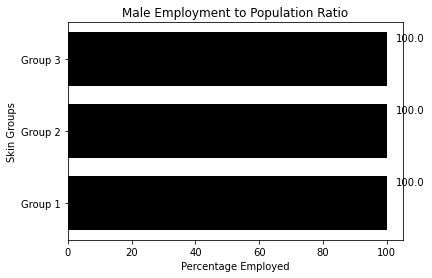

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

data = {'Group 1':pop_1_percent, 'Group 2':pop_2_percent, 'Group 3':pop_3_percent}
x = list(data.keys())
y = list(data.values())

fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))

ax.barh(ind, y, width, color = "black")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v),
            color = 'black')

plt.yticks(ind, x)

plt.xlabel("Percentage Employed")
plt.ylabel("Skin Groups")
plt.title("Male Employment to Population Ratio")

plt.show()

### Employment to Population Ratio Female

In [34]:
figure_1_female = figure_1[figure_1.gender == 2]

population_1_f = [figure_1_female[figure_1_female["Skin_Groups"]==1].count()][0][0]
population_2_f = [figure_1_female[figure_1_female["Skin_Groups"]==2].count()][0][0]
population_3_f = [figure_1_female[figure_1_female["Skin_Groups"]==3].count()][0][0]

pop_1_employed_f = [figure_1_female[(figure_1_female["Skin_Groups"]==1) & (figure_1_female["employed"]==1)].count()][0][0]
pop_2_employed_f = [figure_1_female[(figure_1_female["Skin_Groups"]==2) & (figure_1_female["employed"]==1)].count()][0][0]
pop_3_employed_f = [figure_1_female[(figure_1_female["Skin_Groups"]==3) & (figure_1_female["employed"]==1)].count()][0][0]

pop_1_percent_f = (pop_1_employed_f/population_1_f)*100
pop_2_percent_f = (pop_2_employed_f/population_2_f)*100
pop_3_percent_f = (pop_3_employed_f/population_3_f)*100

print(pop_1_percent_f, pop_2_percent_f, pop_3_percent_f)

100.0 100.0 100.0


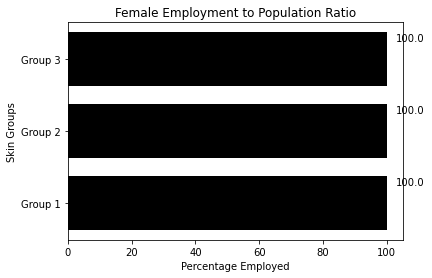

In [35]:
data_f = {'Group 1': pop_1_percent_f, 'Group 2': pop_2_percent_f, 'Group 3': pop_3_percent_f}
x_f = list(data_f.keys())
y_f = list(data_f.values())

fig_f, ax_f = plt.subplots()
width_f = 0.75
ind_f = np.arange(len(y_f))

ax_f.barh(ind_f, y_f, width_f, color = "black")
 
for i_f, v_f in enumerate(y_f):
    ax_f.text(v_f + 3, i_f + .25, str(v_f),
            color = 'black')

plt.yticks(ind_f, x_f)

plt.xlabel("Percentage Employed")
plt.ylabel("Skin Groups")
plt.title("Female Employment to Population Ratio")

plt.show()